In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
nombre_archivo_excel = 'resonancia.xlsx'

In [3]:
todas_las_hojas = pd.read_excel(nombre_archivo_excel, sheet_name=None, engine='openpyxl')

df = todas_las_hojas["Hoja1"]
frecuencia = df.iloc[1:, 2] 
frecuencia_np_array = np.array(frecuencia)
w = frecuencia_np_array*2*np.pi
Vpp1 = df.iloc[1:, 3] 
Vpp2 = df.iloc[1:, 4]
fase = df.iloc[1:, 5] 
delta = fase *np.pi/180

w_ = []
for i in w:
    w_.append(round(i))
    
w_ = np.array(w_)

Text(0, 0.5, '$V_{pp1}$ [V]')

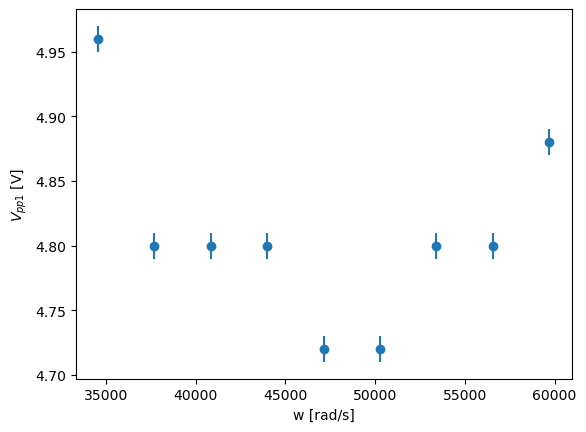

In [4]:
plt.errorbar(w,Vpp1,yerr = 0.01,fmt='o')
plt.xlabel("w [rad/s]")
plt.ylabel("$V_{pp1}$ [V]")

Text(0, 0.5, '$V_{pp2}$ [V]')

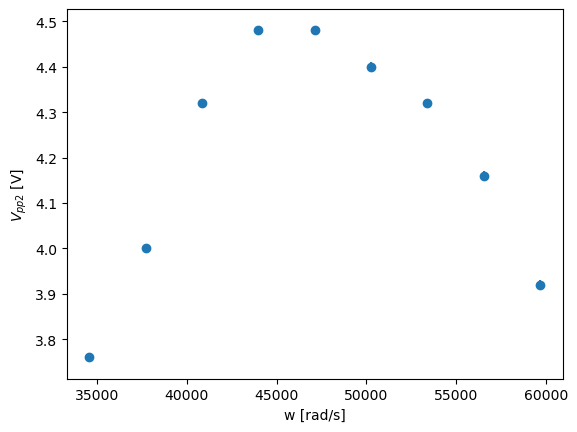

In [5]:
plt.errorbar(w,Vpp2,yerr = 0.01,fmt='o')
plt.xlabel("w [rad/s]")
plt.ylabel("$V_{pp2}$ [V]")

Text(0, 0.5, '$\\delta$ [rad]')

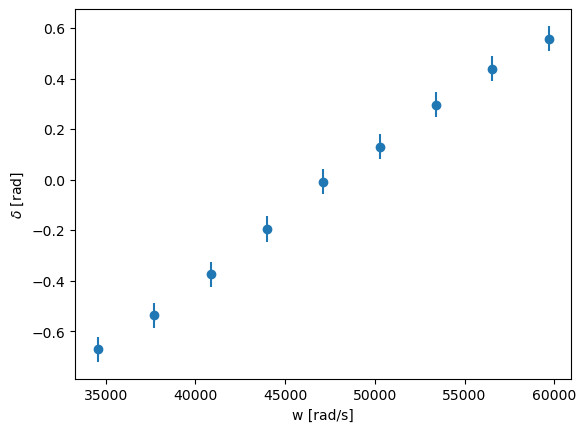

In [6]:
plt.errorbar(w,delta,yerr=0.05,fmt='o')
plt.xlabel("w [rad/s]")
plt.ylabel("$\delta$ [rad]")

[1.95089625e-02 1.32920883e+03 2.04029278e+02]
[4.48851474e+00 4.25460540e+04 4.66892007e+04]


Text(0, 0.5, '$V_{pp2}$ [V]')

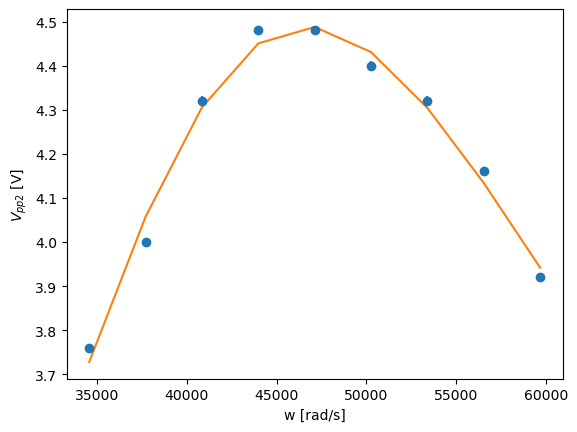

In [8]:
def Av(w, V0, gamma,w0):
    numerador = V0*gamma*(w)
    denominador = ((w)**2)*(gamma**2)+((w0**2-(w)**2))**2
    return numerador/denominador**0.5


res_1, con_1 = curve_fit(Av, w, Vpp2, p0=[4.5,10e3,10e3])
#4.5,10e3,10e2,10e2
perr = np.sqrt(np.diag(con_1))
print(perr)
Vpp_2 = Av(w,*res_1) 
print(res_1)
plt.errorbar(w,Vpp2,yerr = 0.01,fmt='o')
plt.plot(w,Vpp_2)
plt.xlabel("w [rad/s]")
plt.ylabel("$V_{pp2}$ [V]")

[ 97.76430964 509.52743286]
[ 47375.83005123 -36665.64399187]


Text(0, 0.5, '$\\delta$ [rad]')

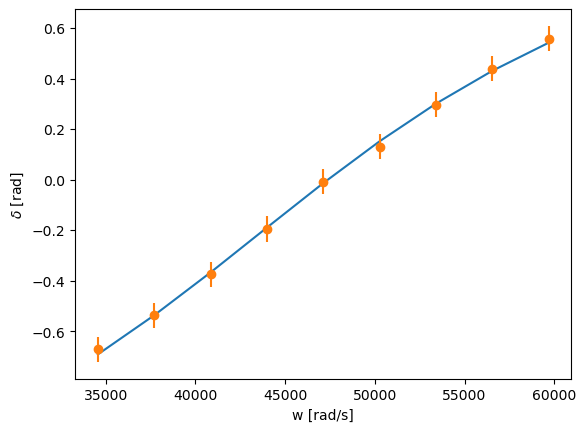

In [10]:
def ajuste(w,w0,gamma):
    return np.arctan((w0**2-(w)**2)/(w*gamma))



res_1, con_1 = curve_fit(ajuste, w, delta, p0=[45000,-40000])

perr = np.sqrt(np.diag(con_1))
print(perr)
print(res_1)

plt.plot(w_,ajuste(w_,*res_1))
plt.errorbar(w,delta,yerr=0.05,fmt='o')
plt.xlabel("w [rad/s]")
plt.ylabel("$\delta$ [rad]")